# Libraries
Before beginning modelling we have to first import all the libraries and install all the dependencies required.
If you're using Colab, no need of downloading dependencies.
But if you're on a local system, do execute the commented dependencies staring with an '!'.

In [3]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from PIL import Image
#!pip install tensorflow
#!pip install numpy

# Datasets
We have used a dataset from Kaggle where X.npy contains all the images in a numpy array and Y.npy contains labels for the images in a numpy array.<br>
Here we are uploading the datasets and this is to be done for Google Colab only.<br>
If you want to use this model locally, use the commented code for importing the dataset on a local jupyter notebook assuming the data is in the same folder as the Jupyter Notebook.

In [4]:
from google.colab import files
uploaded=files.upload()

Saving X.npy to X.npy


In [5]:
from google.colab import files
uploaded=files.upload()

Saving Y.npy to Y.npy


Here we are loading the datasets into variables for future use

In [6]:
X = np.load('X.npy').reshape(2062,64,64,1)
Y = np.load('Y.npy')
A=np.load('X.npy')
B=np.load('Y.npy')

Data is split here into training and test sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
A_train, A_test, B_train, B_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Architecture
The model's architecture is designed here. We use a Convolutional Neural Network as we are processing images. 

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1),kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

A brief summary of the model which includes various parameters can be viewed using summary() function.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         2

Model is compiled using categorical crossentropy function as we are using softmax as the end layer to categorize multiple objects.

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model is fitted and is run across the data for 50 epochs.

In [11]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50)

Epoch 1/50
52/52 [==============================] - 17s 321ms/step - loss: 2.6356 - accuracy: 0.1455 - val_loss: 2.1278 - val_accuracy: 0.1332
Epoch 2/50
52/52 [==============================] - 17s 321ms/step - loss: 1.2089 - accuracy: 0.5967 - val_loss: 0.5432 - val_accuracy: 0.8136
Epoch 3/50
52/52 [==============================] - 17s 326ms/step - loss: 0.4598 - accuracy: 0.8545 - val_loss: 0.3068 - val_accuracy: 0.8789
Epoch 4/50
52/52 [==============================] - 17s 321ms/step - loss: 0.2479 - accuracy: 0.9260 - val_loss: 0.2841 - val_accuracy: 0.8862
Epoch 5/50
52/52 [==============================] - 17s 318ms/step - loss: 0.1569 - accuracy: 0.9569 - val_loss: 0.1672 - val_accuracy: 0.9564
Epoch 6/50
52/52 [==============================] - 17s 322ms/step - loss: 0.0853 - accuracy: 0.9751 - val_loss: 0.1512 - val_accuracy: 0.9588
Epoch 7/50
52/52 [==============================] - 17s 330ms/step - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0896 - val_accuracy: 0.9734

Train and Test Accuracy can be obtained.

In [12]:
score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Train loss: 9.539865459373686e-06
Train accuracy: 1.0
Test loss: 0.07356801629066467
Test accuracy: 0.980629563331604


Function for end result as labels are [9,8,7,6,5,4,3,2,1,0] whereas argmax function will call the reverse order as the result we want to obtain.

In [13]:
def num(no):
  if(no==0):
    a=9
  if(no==1):
    a=8
  if(no==2):
    a=7
  if(no==3):
    a=6
  if(no==4):
    a=5
  if(no==5):
    a=4
  if(no==6):
    a=3
  if(no==7):
    a=2
  if(no==8):
    a=1
  if(no==9):
    a=0
  return a

Model can be tested by any random image from the dataset. Let's say you want to test image 47. So edit the X[0:1] to X[47:48] and in general [n:n+1] for any image.

In [15]:
result = num(np.argmax(model.predict(X[0:1])))

print(result)

9


The prediction can be verified by actually checking the dataset. Edit A[0] to any A[n] used above.

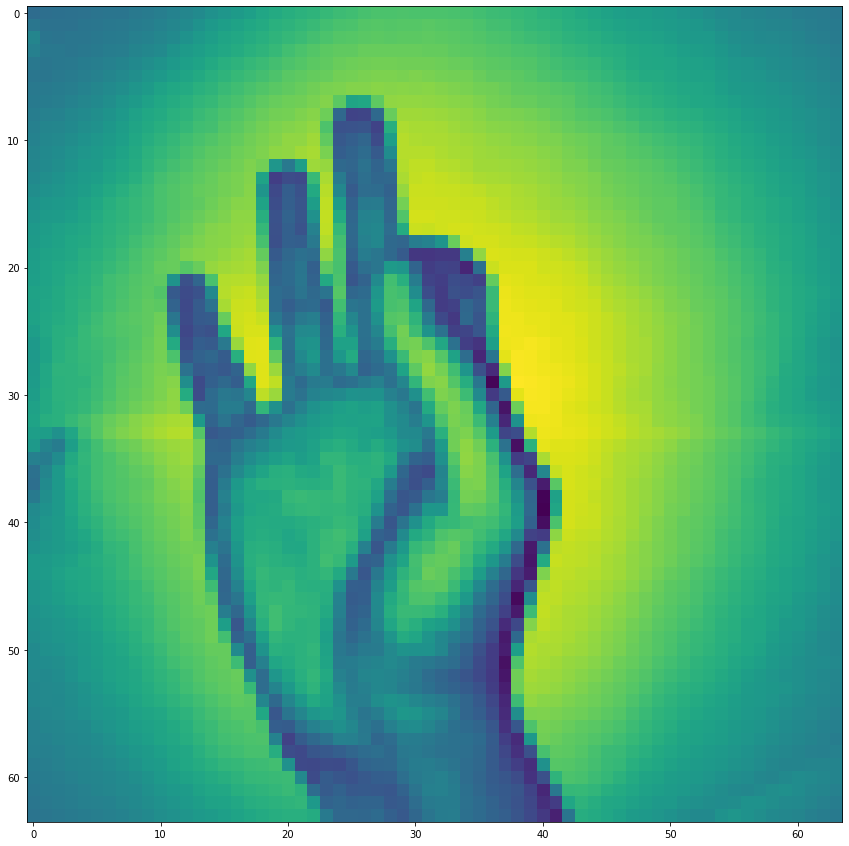

In [16]:
plt.figure(figsize=(15,15))
plt.imshow(A[0])